In [157]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt


In [158]:
import numpy as np
import pandas as pd

In [159]:
import datetime
from dateutil.relativedelta import relativedelta
from sqlalchemy import cast, Date

# Reflect Tables into SQLAlchemy ORM

In [160]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect, func

In [161]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [162]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect = True)

In [163]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [164]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station


In [165]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

## Percipitation Analysis

In [166]:
# Use the Inspector to explore the database and print the table names
inspector = inspect(engine)
inspector.get_table_names()

['measurement', 'station']

In [167]:
# Use Inspector to print the column names and types
columns = inspector.get_columns('measurement')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [193]:
# Use Inspector to print the column names and types
columns = inspector.get_columns('station')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [168]:
# Use `engine.execute` to select and display the first 10 rows from the emoji table
engine.execute('SELECT * FROM measurement LIMIT 10').fetchall()

[(1, 'USC00519397', '2010-01-01', 0.08, 65.0),
 (2, 'USC00519397', '2010-01-02', 0.0, 63.0),
 (3, 'USC00519397', '2010-01-03', 0.0, 74.0),
 (4, 'USC00519397', '2010-01-04', 0.0, 76.0),
 (5, 'USC00519397', '2010-01-06', None, 73.0),
 (6, 'USC00519397', '2010-01-07', 0.06, 70.0),
 (7, 'USC00519397', '2010-01-08', 0.0, 64.0),
 (8, 'USC00519397', '2010-01-09', 0.0, 68.0),
 (9, 'USC00519397', '2010-01-10', 0.0, 73.0),
 (10, 'USC00519397', '2010-01-11', 0.01, 64.0)]

In [169]:
#Find the maximum date in the database
max_date = session.query(func.max(Measurement.date)).all()

max_date_only = max_date[0][0]
max_date_only

'2017-08-23'

In [170]:
#Convert the string type date into date format
datetime_object = datetime.datetime.strptime(max_date_only, '%Y-%m-%d')
datetime_object= datetime.datetime.date(datetime_object)


In [171]:
# Calculate the date 1 year ago from the last data point in the database
twelves_months_ago_prcp = datetime_object - relativedelta(months=+12)
twelves_months_ago_prcp

datetime.date(2016, 8, 23)

In [172]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
# Perform a query to retrieve the data and precipitation scores
results = session.query(Measurement.id, Measurement.station, Measurement.date, Measurement. prcp, Measurement.tobs).\
filter(Measurement.date > twelves_months_ago_prcp).filter(Measurement.date < datetime_object).all()

results

[(2365, 'USC00519397', '2016-08-24', 0.08, 79.0),
 (2366, 'USC00519397', '2016-08-25', 0.08, 80.0),
 (2367, 'USC00519397', '2016-08-26', 0.0, 79.0),
 (2368, 'USC00519397', '2016-08-27', 0.0, 77.0),
 (2369, 'USC00519397', '2016-08-28', 0.01, 78.0),
 (2370, 'USC00519397', '2016-08-29', 0.0, 78.0),
 (2371, 'USC00519397', '2016-08-30', 0.0, 79.0),
 (2372, 'USC00519397', '2016-08-31', 0.13, 80.0),
 (2373, 'USC00519397', '2016-09-01', 0.0, 81.0),
 (2374, 'USC00519397', '2016-09-02', 0.0, 80.0),
 (2375, 'USC00519397', '2016-09-03', 0.0, 79.0),
 (2376, 'USC00519397', '2016-09-04', 0.03, 75.0),
 (2377, 'USC00519397', '2016-09-05', None, 79.0),
 (2378, 'USC00519397', '2016-09-06', None, 76.0),
 (2379, 'USC00519397', '2016-09-07', 0.05, 76.0),
 (2380, 'USC00519397', '2016-09-08', 0.0, 80.0),
 (2381, 'USC00519397', '2016-09-09', 0.03, 79.0),
 (2382, 'USC00519397', '2016-09-10', 0.0, 78.0),
 (2383, 'USC00519397', '2016-09-11', 0.05, 76.0),
 (2384, 'USC00519397', '2016-09-12', 0.0, 78.0),
 (2385, 'U

In [173]:
# Save the query results as a Pandas DataFrame and set the index to the date column
df = pd.DataFrame(results, columns=['id', 'station', 'date', 'prcp', 'tobs'])
df.set_index('date', inplace = True)

# Sort the dataframe by date
df.sort_values(by = 'date')

,id,station,prcp,tobs
date,,,,
2016-08-24,2365,USC00519397,0.08,79.0
2016-08-24,8826,USC00517948,NaN,78.0
2016-08-24,14609,USC00519281,2.15,77.0
2016-08-24,7332,USC00514830,2.28,80.0
2016-08-24,5092,USC00513117,2.15,76.0
...,...,...,...,...
2017-08-21,12185,USC00519523,NaN,82.0
2017-08-21,7634,USC00514830,0.02,79.0
2017-08-22,12186,USC00519523,0.00,82.0


In [174]:
df.dtypes

id           int64
station     object
prcp       float64
tobs       float64
dtype: object

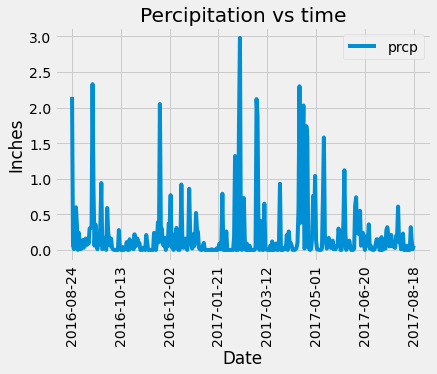

In [217]:
# Use Pandas Plotting with Matplotlib to plot the data
new_df = pd.DataFrame(df['prcp'])
new_df
new_df.plot()
plt.title('Percipitation vs time')
plt.xlabel('Date')
plt.ylabel('Inches')
plt.xticks(rotation=90)
plt.show()

In [176]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df['prcp'].describe()

count    2011.000000
mean        0.176549
std         0.460667
min         0.000000
25%         0.000000
50%         0.020000
75%         0.130000
max         6.700000
Name: prcp, dtype: float64

## Station Analysis

In [177]:
# Design a query to show how many stations are available in this dataset?
results = session.query(Measurement).distinct(Measurement.station).count()
results

19550

In [192]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
results = session.query(Measurement.station, func.count(Measurement.station)).group_by(Measurement.station).\
order_by(func.count(Measurement.station).desc()).all()
results

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [195]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
results = session.query(func.min(Measurement.tobs),func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
filter(Measurement.station == 'USC00519281').all()

results


[(54.0, 85.0, 71.66378066378067)]

In [208]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
results2 = session.query(Measurement.id, Measurement.station, Measurement.date, Measurement. prcp, Measurement.tobs).\
filter(Measurement.station == 'USC00519281').\
filter(Measurement.date > twelves_months_ago_prcp).filter(Measurement.date < datetime_object).all()

results2

[(14609, 'USC00519281', '2016-08-24', 2.15, 77.0),
 (14610, 'USC00519281', '2016-08-25', 0.06, 80.0),
 (14611, 'USC00519281', '2016-08-26', 0.01, 80.0),
 (14612, 'USC00519281', '2016-08-27', 0.12, 75.0),
 (14613, 'USC00519281', '2016-08-28', 0.6, 73.0),
 (14614, 'USC00519281', '2016-08-29', 0.35, 78.0),
 (14615, 'USC00519281', '2016-08-30', 0.0, 77.0),
 (14616, 'USC00519281', '2016-08-31', 0.24, 78.0),
 (14617, 'USC00519281', '2016-09-01', 0.02, 80.0),
 (14618, 'USC00519281', '2016-09-02', 0.01, 80.0),
 (14619, 'USC00519281', '2016-09-03', 0.12, 78.0),
 (14620, 'USC00519281', '2016-09-04', 0.14, 78.0),
 (14621, 'USC00519281', '2016-09-05', 0.03, 78.0),
 (14622, 'USC00519281', '2016-09-06', 0.11, 73.0),
 (14623, 'USC00519281', '2016-09-07', 0.16, 74.0),
 (14624, 'USC00519281', '2016-09-08', 0.07, 80.0),
 (14625, 'USC00519281', '2016-09-09', 0.16, 79.0),
 (14626, 'USC00519281', '2016-09-10', 0.09, 77.0),
 (14627, 'USC00519281', '2016-09-11', 0.3, 80.0),
 (14628, 'USC00519281', '2016-09-1

In [198]:
# Save the query results as a Pandas DataFrame and set the index to the date column
df = pd.DataFrame(results2, columns=['id', 'station', 'date', 'prcp', 'tobs'])
df.set_index('date', inplace = True)

# Sort the dataframe by date
df.sort_values(by = 'date')


,id,station,prcp,tobs
date,,,,
2016-08-24,14609,USC00519281,2.15,77.0
2016-08-25,14610,USC00519281,0.06,80.0
2016-08-26,14611,USC00519281,0.01,80.0
2016-08-27,14612,USC00519281,0.12,75.0
2016-08-28,14613,USC00519281,0.60,73.0
...,...,...,...,...
2017-08-14,14955,USC00519281,0.00,77.0
2017-08-15,14956,USC00519281,0.32,77.0
2017-08-16,14957,USC00519281,0.12,76.0


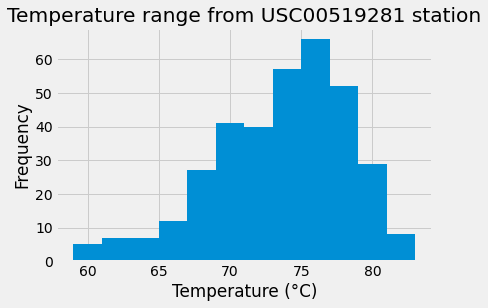

In [219]:
#plot the results as a histogram
temperatures = df['tobs']

plt.hist(temperatures, bins = 12)
plt.title('Temperature range from USC00519281 station')
plt.xlabel('Temperature (°C)')
plt.ylabel('Frequency')
plt.show()


## Bonus Challenge Assignment

In [ ]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

In [ ]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


In [ ]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [ ]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
